In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis
import yfinance as yf


In [35]:
timeframe = '30min'

In [36]:
# result_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_{timeframe}_ib_reduced.csv")
# pnl_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_{timeframe}_ib_reduced.csv")
# counts_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_{timeframe}_ib_reduced.csv")

# result_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_{timeframe}_comb_reduced.csv")
# pnl_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_{timeframe}_comb_reduced.csv")
# counts_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_{timeframe}_comb_reduced.csv")

# result_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_{timeframe}_all_reduced.csv")
# pnl_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_{timeframe}_all_reduced.csv")
# counts_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_{timeframe}_all_reduced.csv")

In [37]:
result_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_{timeframe}_ib_red_final.csv")
pnl_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_{timeframe}_ib_red_final.csv")
counts_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_{timeframe}_ib_red_final.csv")

result_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_{timeframe}_comb_red_final.csv")
pnl_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_{timeframe}_comb_red_final.csv")
counts_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_{timeframe}_comb_red_final.csv")

result_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_{timeframe}_all_red_final.csv")
pnl_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_{timeframe}_all_red_final.csv")
counts_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_{timeframe}_all_red_final.csv")

In [38]:
# result_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_ib_momum_05_{timeframe}.csv")
# pnl_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_ib_momum_05_{timeframe}.csv")
# counts_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_ib_momum_05_{timeframe}.csv")

# result_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_comb_momum_05_{timeframe}.csv")
# pnl_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_comb_momum_05_{timeframe}.csv")
# counts_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_comb_momum_05_{timeframe}.csv")

# result_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_all_momum_05_{timeframe}.csv")
# pnl_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_all_momum_05_{timeframe}.csv")
# counts_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_all_momum_05_{timeframe}.csv")

In [39]:
# result_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_ib_momum_{timeframe}.csv")
# pnl_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_ib_momum_{timeframe}.csv")
# counts_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_ib_momum_{timeframe}.csv")

# result_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_comb_momum_{timeframe}.csv")
# pnl_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_comb_momum_{timeframe}.csv")
# counts_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_comb_momum_{timeframe}.csv")

# result_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/results_portfolio_all_momum_{timeframe}.csv")
# pnl_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/pnl_portfolio_all_momum_{timeframe}.csv")
# counts_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/counts_portfolio_all_momum_{timeframe}.csv")

In [40]:
result_ib.set_index("date", inplace=True)
result_comb.set_index("date", inplace=True)
result_all.set_index("date", inplace=True)

In [41]:
result_ib.index = pd.to_datetime(result_ib.index)
result_comb.index = pd.to_datetime(result_comb.index)
result_all.index = pd.to_datetime(result_all.index)

In [42]:
pnl_comb['date'] = pd.to_datetime(pnl_comb['date'])
pnl_ib['date'] = pd.to_datetime(pnl_ib['date'])
pnl_all['date'] = pd.to_datetime(pnl_all['date'])

counts_comb['date'] = pd.to_datetime(counts_comb['date'])
counts_ib['date'] = pd.to_datetime(counts_ib['date'])
counts_all['date'] = pd.to_datetime(pnl_all['date'])


In [43]:
def sharpe_test(returns, count_df):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))
    
    annual_sharpe = sharpe_ratio * np.sqrt(252)
    
    PPT = np.sum(returns) / (count_df[['top_counts', 'bottom_counts']].sum(axis=1).sum()) * 10000
    
    return annual_sharpe, PPT, modified_sharpe_stat, p_value

In [44]:
sharpe_lst = []
SR_test_lst = []
pval_lst = []
ppt_lst = []


for cutoff in range(3, 12):
    result_ib_cut = result_ib[result_ib.index.month <= cutoff]
    result_comb_cut = result_comb[result_comb.index.month <= cutoff]
    result_all_cut = result_all[result_all.index.month <= cutoff]

    pnl_ib_cut = pnl_ib[pnl_ib['date'].dt.month <= cutoff]
    pnl_comb_cut = pnl_comb[pnl_comb['date'].dt.month <= cutoff]
    pnl_all_cut = pnl_all[pnl_all['date'].dt.month <= cutoff]


    counts_ib_cut = counts_ib[counts_ib['date'].dt.month <= cutoff]
    counts_comb_cut = counts_comb[counts_comb['date'].dt.month <= cutoff]
    counts_all_cut = counts_all[counts_all['date'].dt.month <= cutoff]
    
    results_cut_lst = [result_all_cut, result_comb_cut, result_ib_cut]
    counts_cut_lst = [counts_all_cut, counts_comb_cut, counts_ib_cut]

    for result, counts in zip(results_cut_lst, counts_cut_lst):
        annual_sharpe, PPT, sharpe_stat, p_val = sharpe_test(result['PnL'], counts)
        sharpe_lst.append(annual_sharpe)
        ppt_lst.append(PPT)
        SR_test_lst.append(sharpe_stat)
        pval_lst.append(p_val)


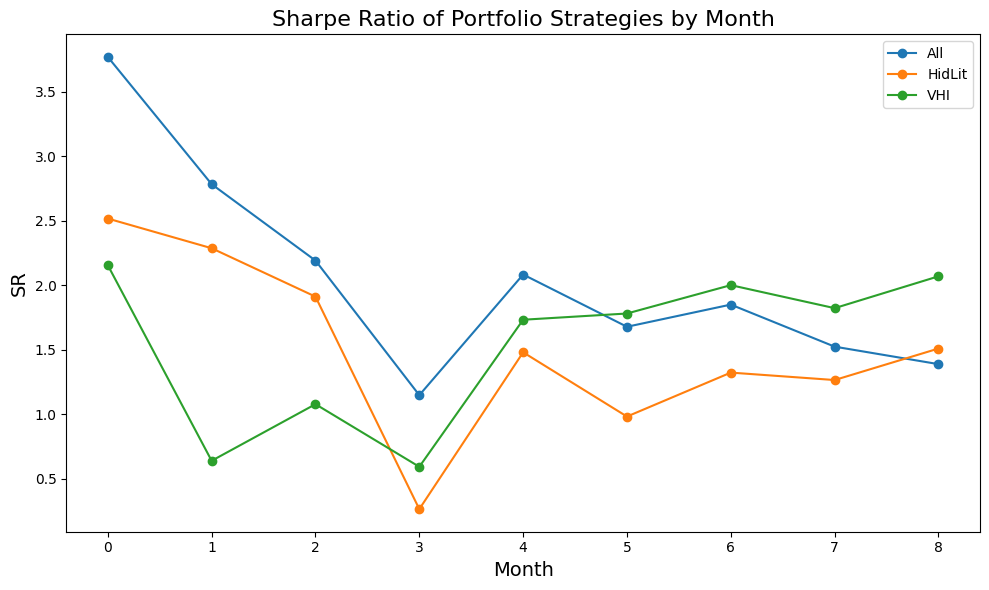

In [45]:
# Create slices for each line plot
SR_all = sharpe_lst[0::3]  # Values starting at index 0, every third value
SR_comb = sharpe_lst[1::3]  # Values starting at index 1, every third value
SR_ib = sharpe_lst[2::3]  # Values starting at index 2, every third value

# Plotting the three lines
plt.figure(figsize=(10, 6))
plt.plot(SR_all, label='All', marker='o')
plt.plot(SR_comb, label='HidLit', marker='o')
plt.plot(SR_ib, label='VHI', marker='o')

# Add title and labels
plt.title('Sharpe Ratio of Portfolio Strategies by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('SR', fontsize=14)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

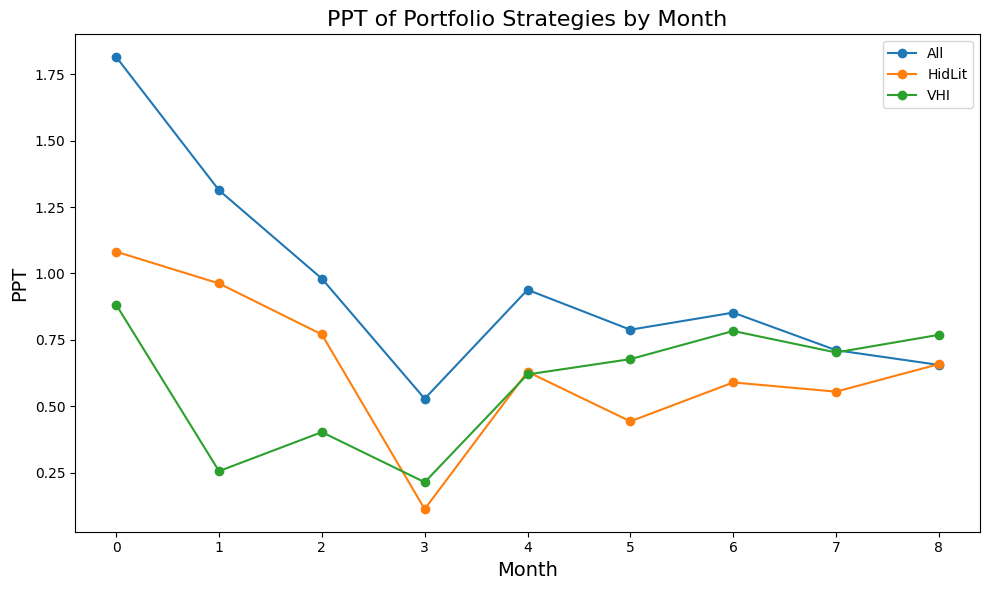

In [46]:
# Create slices for each line plot
PPT_all = ppt_lst[0::3]  # Values starting at index 0, every third value
PPT_comb = ppt_lst[1::3]  # Values starting at index 1, every third value
PPT_ib = ppt_lst[2::3]  # Values starting at index 2, every third value

# Plotting the three lines
plt.figure(figsize=(10, 6))
plt.plot(PPT_all, label='All', marker='o')
plt.plot(PPT_comb, label='HidLit', marker='o')
plt.plot(PPT_ib, label='VHI', marker='o')

# Add title and labels
plt.title('PPT of Portfolio Strategies by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('PPT', fontsize=14)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [47]:
print(sum(pnl_all.groupby("date")['top_pnl'].sum() - pnl_all.groupby("date")['bottom_pnl'].sum() - result_all['PnL']))
print(sum(pnl_comb.groupby("date")['top_pnl'].sum() - pnl_comb.groupby("date")['bottom_pnl'].sum() - result_comb['PnL']))
print(sum(pnl_ib.groupby("date")['top_pnl'].sum() - pnl_ib.groupby("date")['bottom_pnl'].sum() - result_ib['PnL']))

-4.749347616572752e-15
-2.0611767501121925e-15
-1.5247135151663649e-15


In [48]:
results_lst = [result_all, result_comb, result_ib]
pnl_lst = [pnl_all, pnl_comb, pnl_ib]
counts_lst = [counts_all, counts_comb, counts_ib]



label_lst = ['All', 'HidLit', 'VHI']

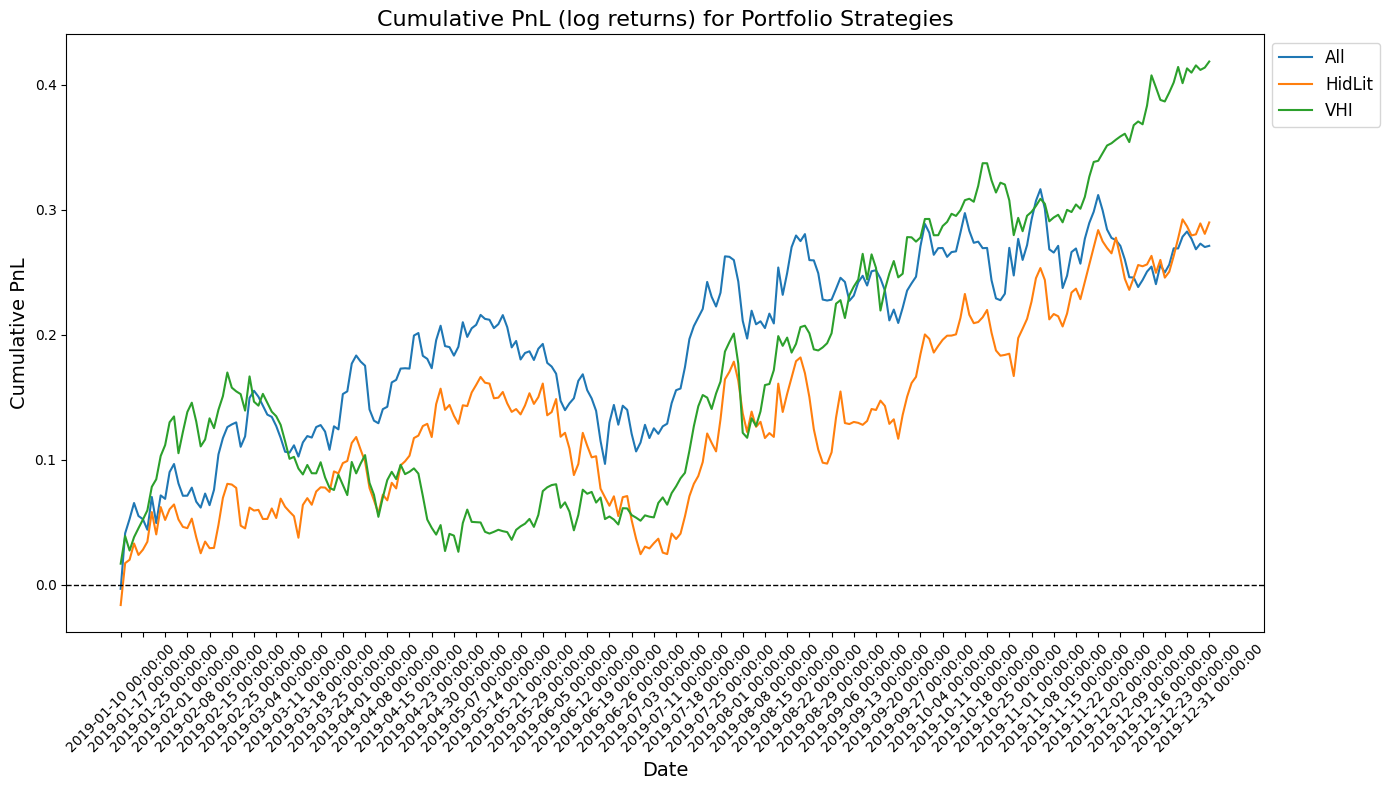

In [49]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))


for results, label in zip(results_lst, label_lst):
    cumulative_pnl = results['PnL'].cumsum().to_frame()
    plt.plot(cumulative_pnl.index.strftime('%Y-%m-%d'), cumulative_pnl['PnL'], label=label)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (log returns) for Portfolio Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(cumulative_pnl.index), 5), labels=cumulative_pnl.index[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()
# Show plot
plt.show()

In [50]:
def sharpe_test(returns, count_df):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))
    
    annual_sharpe = sharpe_ratio * np.sqrt(252)
    
    PPT = np.sum(returns) / (count_df[['top_counts', 'bottom_counts']].sum(axis=1).sum()) * 10000
    
    return annual_sharpe, PPT, modified_sharpe_stat, p_value

In [51]:
sharpe_lst = []
SR_test_lst = []
pval_lst = []
ppt_lst = []


for result, counts in zip(results_lst, counts_lst):
    annual_sharpe, PPT, sharpe_stat, p_val = sharpe_test(result['PnL'], counts)
    sharpe_lst.append(annual_sharpe)
    ppt_lst.append(PPT)
    SR_test_lst.append(sharpe_stat)
    pval_lst.append(p_val)

sharpe_df = pd.DataFrame({'Portfolio': label_lst, 'Annual SR': sharpe_lst, 'PPT': ppt_lst,
                          'SR_statistic': SR_test_lst, 'pval': pval_lst})
sharpe_df

,Portfolio,Annual SR,PPT,SR_statistic,pval
0,All,1.284714,0.588453,1.275324,0.202195
1,HidLit,1.462934,0.626520,1.440211,0.149808
2,VHI,2.266839,0.823651,2.132687,0.032950


In [52]:
ticker_PPT_lst = []

for df_pnl, df_counts, label in zip(pnl_lst, counts_lst, label_lst):
    df_counts['total_counts'] = df_counts['top_counts'] + df_counts['bottom_counts']
    grouped = df_pnl.groupby('ticker')[['top_pnl', 'bottom_pnl']].sum()
    grouped['total_pnl'] = grouped['top_pnl'] - grouped['bottom_pnl']
    grouped_counts = df_counts.groupby('ticker')[['total_counts']].sum()
    grouped = grouped.merge(grouped_counts, left_index=True, right_index=True)
    grouped['PPT'] = grouped['total_pnl'] / grouped['total_counts'] * 10000
    grouped.rename(columns={'PPT': f'PPT_{label}'}, inplace=True)
    ticker_PPT_lst.append(grouped[f'PPT_{label}'])
ticker_PPT_full = pd.concat(ticker_PPT_lst, axis=1)

In [53]:
ticker_SR_lst = []
for df_pnl in pnl_lst:
    df_pnl['overall_pnl'] = df_pnl['top_pnl'] - df_pnl['bottom_pnl']
    grouped = df_pnl.groupby('ticker')['overall_pnl'].agg(['mean', 'std'])
    # Calculate the ratio of mean to standard deviation
    grouped['SR_a'] = grouped['mean'] / grouped['std'] * np.sqrt(252)

    ticker_SR_lst.append(grouped[['SR_a']])

In [54]:
def sharpe_test_ticker(returns):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))
    
    annual_sharpe = sharpe_ratio * np.sqrt(252)
        
    return annual_sharpe, modified_sharpe_stat, p_value

In [55]:
ticker_lst = ['AES', 'ALB', 'AOS', 'APA', 'BEN', 'BXP', 'CPB',
              'DVA', 'FFIV', 'FRT', 'HII', 'HRL', 'HSIC', 'INCY',
              'MHK', 'NWSA', 'PNW', 'RL', 'TAP', 'WYNN']

In [56]:
ticker_SR_lst = []
for df_pnl, label in zip(pnl_lst, label_lst):
    sharpe_type = []
    for ticker in df_pnl['ticker'].unique():
        df_pnl['overall_pnl'] = df_pnl['top_pnl'] - df_pnl['bottom_pnl']
        annual_sharpe, modified_sharpe_stat, p_value = sharpe_test_ticker(df_pnl[df_pnl['ticker']==ticker]['overall_pnl'])
        sharpe_type.append([ticker, annual_sharpe, modified_sharpe_stat])
    SR_df_type = pd.DataFrame(sharpe_type, columns=['ticker', f'SR_{label}', f'test_{label}'])
    SR_df_type.set_index('ticker', inplace=True)
    ticker_SR_lst.append(SR_df_type)
    

In [57]:
ticker_PPT_lst[0]

ticker
ALB     0.492101
FFIV    1.612287
INCY   -0.230796
TAP    -0.804350
WYNN    1.753171
Name: PPT_All, dtype: float64

In [58]:
SR_ticker_all = pd.concat(ticker_SR_lst, axis=1)
SR_ticker_all

,SR_All,test_All,SR_HidLit,test_HidLit,SR_VHI,test_VHI
ticker,,,,,,
ALB,0.426481,0.410715,-0.222466,-0.215685,NaN,NaN
INCY,-0.225289,-0.215877,0.395481,0.384802,NaN,NaN
TAP,-0.798159,-0.742213,-1.885626,-1.830986,-1.039306,-1.020335
WYNN,1.398445,1.346507,2.130608,2.057231,2.460529,2.296002
FFIV,1.441040,1.351238,1.560122,1.514245,2.666947,2.631318
HSIC,NaN,NaN,NaN,NaN,-1.800884,-1.731653
NWSA,NaN,NaN,NaN,NaN,0.540000,0.521019


/tmp/ipykernel_52839/488825445.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df.index, rotation=45, ha='right')


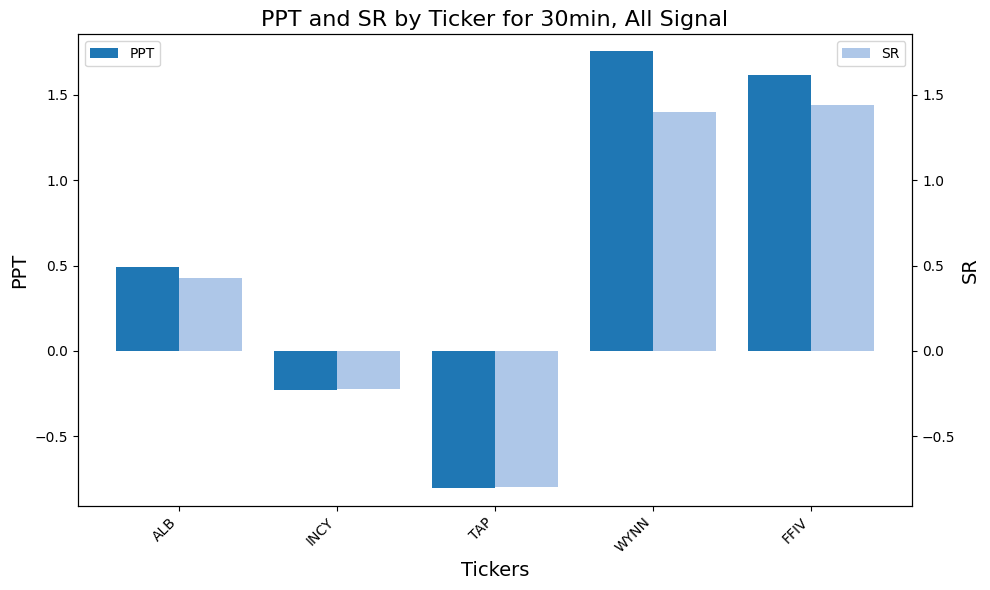

In [59]:
# Drop rows with NaN values
df = SR_ticker_all[['SR_All']]
df = df.dropna()
df = df.merge(ticker_PPT_lst[0], left_index=True, right_index=True)


# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the bar width
bar_width = 0.4

# Create positions for the bars on the x-axis
x = np.arange(len(df.index))

# Plot PPT on primary y-axis
ax1.bar(x - bar_width/2, df['PPT_All'], width=bar_width, color='#1f77b4', label='PPT')

# Create secondary y-axis for SR
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, df['SR_All'], width=bar_width, color='#aec7e8', label='SR')

# Labeling axes
ax1.set_xlabel('Tickers', fontsize=14)
ax1.set_ylabel('PPT', fontsize=14)
ax2.set_ylabel('SR', fontsize=14)

# Title and layout
plt.title('PPT and SR by Ticker', fontsize=16)
ax1.set_xticklabels(df.index, rotation=45, ha='right')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set the same zero-aligned limits on both y-axes
min_test_all = df['PPT_All'].min() - 0.1
max_test_all = df['PPT_All'].max() + 0.1
min_sr_all = df['SR_All'].min() - 0.1
max_sr_all = df['SR_All'].max() + 0.1
# Determine the overall min and max for each axis to include zero
y_min = min(min_test_all, min_sr_all, 0)
y_max = max(max_test_all, max_sr_all, 0)

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Labeling axes
ax1.set_xlabel('Tickers', fontsize=14)
ax1.set_ylabel('PPT', fontsize=14)
ax2.set_ylabel('SR', fontsize=14)

# Set x-ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df.index, rotation=45, ha='right')

# Title and layout
plt.title('PPT and SR by Ticker for 30min, All Signal', fontsize=16)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

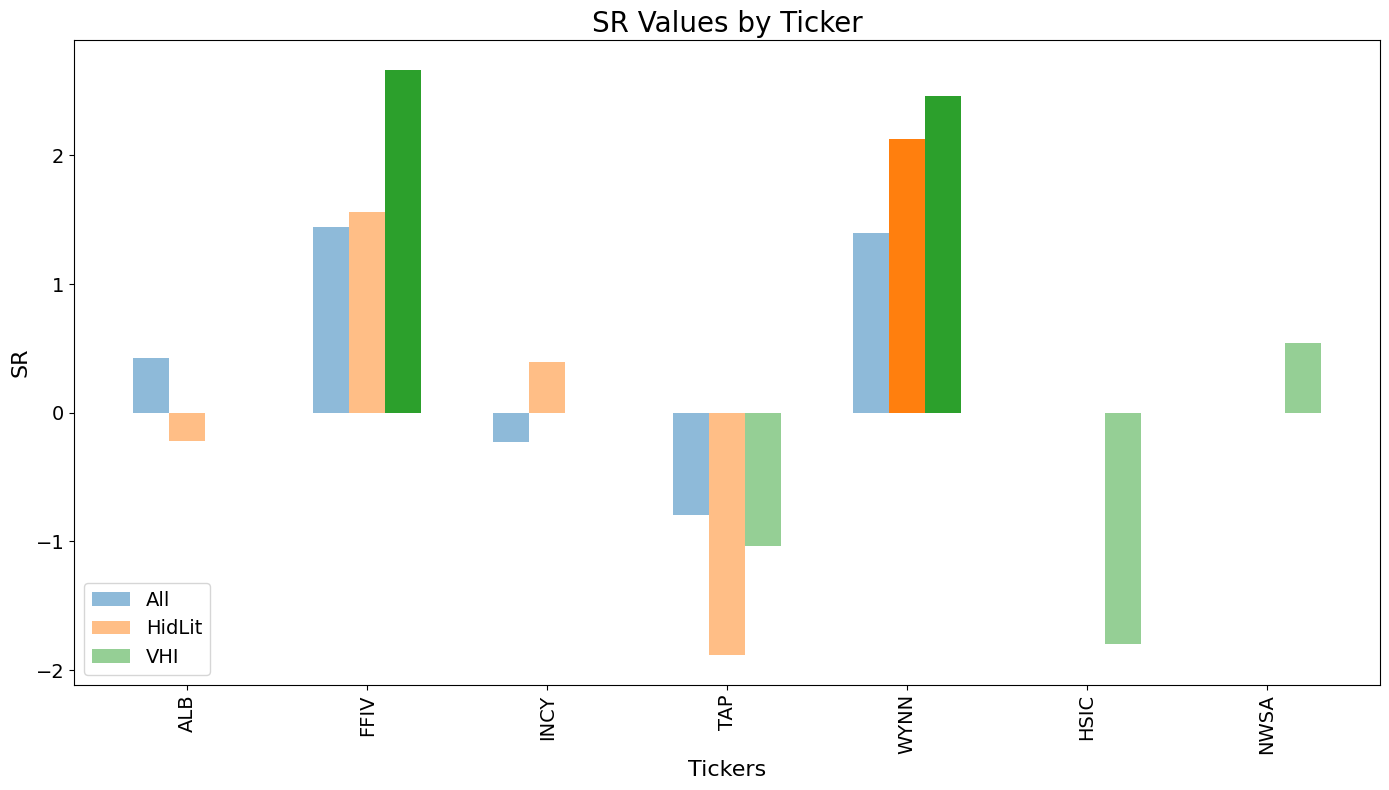

In [60]:
# Assuming df is your DataFrame with tickers as the index and the required columns
# Define the position of each group of bars on the x-axis
custom_order = ['ALB', 'FFIV', 'INCY', 'TAP', 'WYNN', 'HSIC', 'NWSA']  # Example order

# Reorder the DataFrame index based on your custom order
SR_ticker_all = SR_ticker_all.loc[custom_order]

x = range(len(SR_ticker_all.index))

# Define the width of each bar
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define the colors for each type of bar
color_all = '#1f77b4'   # Blue
color_comb = '#ff7f0e'  # Orange
color_vhi = '#2ca02c'   # Green

# Plotting each SR column as individual bars with alpha based on the test values
for i, pos in enumerate(x):
    ax.bar(pos - bar_width, SR_ticker_all['SR_All'].iloc[i], width=bar_width, label='All' if i == 0 else "", 
           color=color_all, alpha=1 if SR_ticker_all['test_All'].iloc[i] > 1.96 else 0.5)
    ax.bar(pos, SR_ticker_all['SR_HidLit'].iloc[i], width=bar_width, label='HidLit' if i == 0 else "", 
           color=color_comb, alpha=1 if SR_ticker_all['test_HidLit'].iloc[i] > 1.96 else 0.5)
    ax.bar(pos + bar_width, SR_ticker_all['SR_VHI'].iloc[i], width=bar_width, label='VHI' if i == 0 else "", 
           color=color_vhi, alpha=1 if SR_ticker_all['test_VHI'].iloc[i] > 1.96 else 0.5)

# Add some text for labels, title and axes ticks with larger font size
ax.set_xlabel('Tickers', fontsize=16)
ax.set_ylabel('SR', fontsize=16)
ax.set_title('SR Values by Ticker', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(SR_ticker_all.index, rotation=90, fontsize=14)

# Increase the font size of the legend
ax.legend(fontsize=14)

# Increase the font size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
df = pd.concat(ticker_PPT_lst)

In [33]:
# Alternative code for PPT calculations
# # Define your custom order for the tickers
# custom_order = ['ALB', 'INCY', 'TAP', 'WYNN', 'FFIV', 'HSIC', 'NWSA']  # Example order

# # Reorder the DataFrame index based on your custom order
# df_reordered = df.loc[custom_order]

# # Define the position of each group of bars on the x-axis
# x = range(len(df_reordered.index))

# # Define the width of each bar
# bar_width = 0.2

# # Create the plot
# fig, ax = plt.subplots(figsize=(14, 8))

# # Define the colors for each type of bar
# color_all = '#1f77b4'   # Blue
# color_comb = '#ff7f0e'  # Orange
# color_vhi = '#2ca02c'   # Green

# # Plotting each SR column as individual bars with alpha based on the test values
# for i, pos in enumerate(x):
#     ax.bar(pos - bar_width, df_reordered['PPT_All'].iloc[i], width=bar_width, label='All' if i == 0 else "", 
#            color=color_all)
#     ax.bar(pos, df_reordered['PPT_HidLit'].iloc[i], width=bar_width, label='HidLit' if i == 0 else "", 
#            color=color_comb)
#     ax.bar(pos + bar_width, df_reordered['PPT_VHI'].iloc[i], width=bar_width, label='VHI' if i == 0 else "", 
#            color=color_vhi)

# # Add some text for labels, title and axes ticks with larger font size
# ax.set_xlabel('Tickers', fontsize=16)
# ax.set_ylabel('PPT', fontsize=16)
# ax.set_title('PPT Values by Ticker', fontsize=20)
# ax.set_xticks(x)
# ax.set_xticklabels(df_reordered.index, rotation=90, fontsize=14)  # Use reordered index

# # Increase the font size of the legend
# ax.legend(fontsize=14)

# # Increase the font size of the y-axis tick labels
# ax.tick_params(axis='y', labelsize=14)

# # Show the plot
# plt.tight_layout()
# plt.show()